In [1]:
import sys, warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# seed connectivity
post hoc analysis

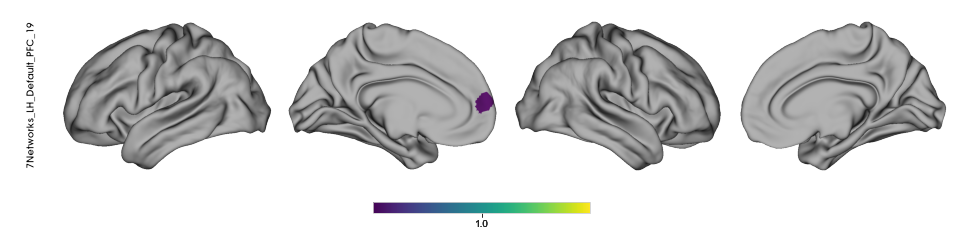

In [1]:
from load_timeseries import spot_region
from plot_brain import plot_brain, plot_brain_masked

sample_region = '7Networks_LH_Default_PFC_19'
plot_brain(spot_region(sample_region),
           text=sample_region)

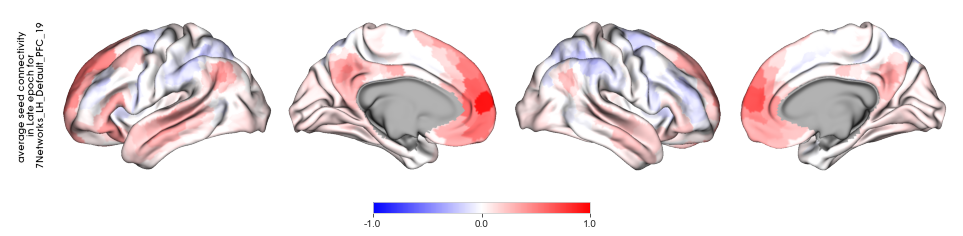

In [2]:
from seed_conn import seed_connectivity, seed_average

df_seed = seed_connectivity(sample_region)
df_seed_avg = seed_average(df_seed)
text = 'average seed connectivity \n in Late epoch for \n' + sample_region
plot_brain(df_seed_avg.loc[sample_region, 'late'],
           color_range=(-1, 1), color_map='bwr', text=text)

## pairwise t-tests seed

In [3]:
from stats import seed_ttests

df_seed_shift = seed_ttests(df_seed)
df_seed_shift

Computing ttests...


100%|██████████| 998/998 [00:11<00:00, 87.21it/s]


region     tstat  pvalue_corrected
A        B                                                          
baseline early  7Networks_LH_Cont_Cing_1 -1.407946          0.476243
         early  7Networks_LH_Cont_Cing_2 -1.874426          0.096284
         early  7Networks_LH_Cont_Cing_3 -3.154645          0.006598
         early  7Networks_LH_Cont_Cing_4 -1.204198          0.626857
         early  7Networks_LH_Cont_Cing_5 -2.186090          0.094391
...                                  ...       ...               ...
early    late        7Networks_RH_Vis_79 -0.440666          0.660536
         late         7Networks_RH_Vis_8 -0.198674          0.842976
         late        7Networks_RH_Vis_80 -0.760164          0.673783
         late        7Networks_RH_Vis_81 -0.300558          0.865311
         late         7Networks_RH_Vis_9 -1.081094          0.423914

[2994 rows x 3 columns]

In [4]:
df_seed_shift_ = df_seed_shift.loc['baseline', 'early']

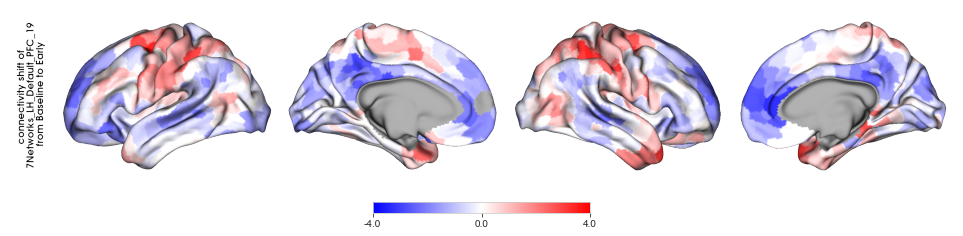

In [5]:
text = 'connectivity shift of \n' + sample_region + '\n from Baseline to Early'

plot_brain(df_seed_shift_, 'tstat', color_range=(-4, 4), color_map='bwr', text=text)

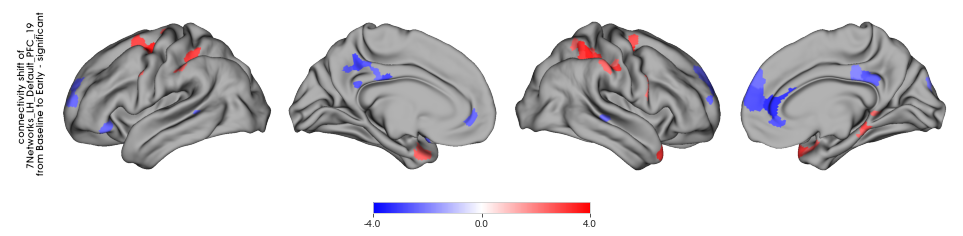

In [6]:
plot_brain_masked(df_seed_shift_, 'tstat', 'pvalue_corrected',
                  color_range=(-4, 4), color_map='bwr', text=text + ' - significant')